### Objective

#### From the given data, we want to know what a person's salary would be at level 6.

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv(r"Pos_Sal.csv")

### Data Preprocessing

#### After loading the data and checking the shape, I found this is very small data with three variables and 10 instances. After this, I checked for null values and data type. After this, I divided the data into X(independent variable, this has only level variable because the other variable i.e., Position can be map one to one with levels) and y(dependent variable). Level variable is ordinal so I didn't make dummy of it and used it as it is. 

In [4]:
df.head

<bound method NDFrame.head of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [4]:
print(df.describe())
print(df.shape)
print(df.info())

          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000
(10, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None


In [5]:
display(df.isnull().sum())

Position    0
Level       0
Salary      0
dtype: int64

In [202]:
X=df.iloc[:,1:2].values
y=df.iloc[:,2:].values

#### Below I checked for normalization of the Salary variable and found that it is not normally distributed. So two approaches are used to fulfill assigneent requirement to apply polynomial regression analysis without transformation and regression after normalization.

In [195]:
stats.shapiro(y)

(0.7230921983718872, 0.0016793750692158937)

### Visualization

#### I visualized the data through scatter plot which is following a pattern so after this, I did linear regression and saw that the points are not very near to straight line. From linear regression I found r squared is 0.67 and adjusted r squared is 0.63. But data scatter plot suggesting for polynomial regression so I continued with that.

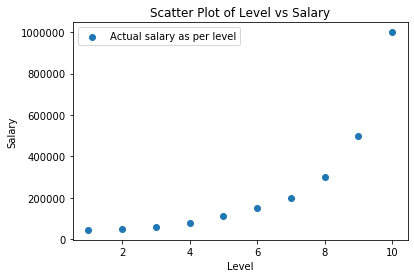

In [69]:
import matplotlib.pyplot as plt
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X,y,label='Actual salary as per level')
plt.legend()
plt.title("Scatter Plot of Level vs Salary")
plt.show()

In [205]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
data=reg.fit(X,y)
a=data.score(X, y)
Adj_r2 = 1-(1-a)*(10-1)/(10-1-1)
coef_m=data.coef_
intercept=data.intercept_
print("R-squared of the linear regression is", a)
print("Adjusted R-squared of the linear regression is", Adj_r2)
print("The linear model has the intercept:", intercept, "and coefficients:", coef_m)

R-squared of the linear regression is 0.6690412331929895
Adjusted R-squared of the linear regression is 0.6276713873421131
The linear model has the intercept: [-195333.33333333] and coefficients: [[80878.78787879]]


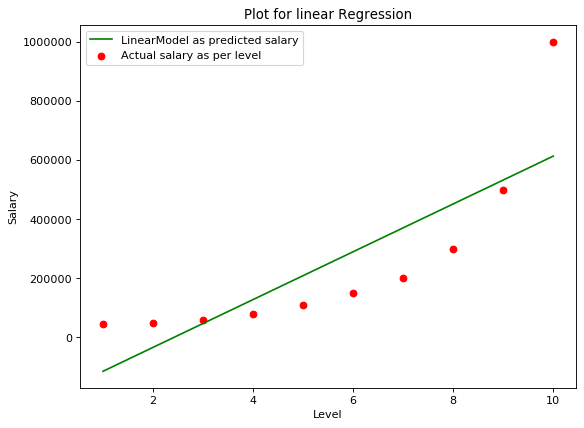

In [10]:
#plotting graphs against data
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='b')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X,y,label='Actual salary as per level', color='red')
plt.plot(X,data.predict(X),label='LinearModel as predicted salary', color='green')
plt.legend()
plt.title("Plot for linear Regression")
plt.show()

### Polynomial Regression

#### I used different degrees for polynomial regression as below. I started from 2 degree to 5 degree. All adjusted r squared and coefficients of each degree model is given below. 

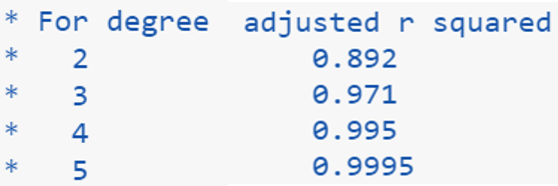

In [100]:

mymodel = numpy.poly1d(numpy.polyfit(X, y, 2))

rsq=r2_score(y, mymodel(X))

Adj_r2 = 1-(1-rsq)*(10-1)/(10-2-1)

coeff=mymodel.coefficients

print("R-Squared for 2 degree polynomial model is:", rsq)
print("Adjusted R-Squared for 2 degree polynomial model is:", Adj_r2)
print("Coeffiecients values for 2 degree polynomial model is", coeff)

R-Squared for 2 degree polynomial model is: 0.9162082221443942
Adjusted R-Squared for 2 degree polynomial model is: 0.8922677141856498
Coeffiecients values for 2 degree polynomial model is [ 1214.48863636 -8304.45075758 14510.41666667]


In [47]:
import numpy
mymodel1 = numpy.poly1d(numpy.polyfit(X, y, 3))

rsq1=r2_score(y, mymodel1(X))

Adj_r21 = 1-(1-rsq1)*(10-1)/(10-3-1)
coeff_1=mymodel1.coefficients
print("R-Squared for 3 degree polynomial model is:", rsq1)
print("Adjusted R-Squared for 3 degree polynomial model is:", Adj_r21)
print("Coeffiecients values for 3 degree polynomial model is", coeff_1)

R-Squared for 3 degree polynomial model is: 0.9812097727913367
Adjusted R-Squared for 3 degree polynomial model is: 0.971814659187005
Coeffiecients values for 3 degree polynomial model is [   4120.04662005  -48548.95104895  180664.33566434 -121333.33333333]


In [45]:
import numpy
mymodel2 = numpy.poly1d(numpy.polyfit(X, y, 4))

rsq2=r2_score(y, mymodel2(X))

Adj_r22 = 1-(1-rsq2)*(10-1)/(10-4-1)
coeff_4=mymodel2.coefficients

print("R-Squared for 4 degree polynomial model is:", rsq2)
print("Adjusted R-Squared for 4 degree polynomial model is:", Adj_r22)
print("Coeffiecients values for 4 degree polynomial model is", coeff_4)

R-Squared for 4 degree polynomial model is: 0.9973922891706614
Adjusted R-Squared for 4 degree polynomial model is: 0.9953061205071905
Coeffiecients values for 4 degree polynomial model is [    890.15151515  -15463.28671329   94765.44289044 -211002.33100233
  184166.66666666]


In [52]:
import numpy
mymodel3 = numpy.poly1d(numpy.polyfit(X, y, 5))

rsq3=r2_score(y, mymodel3(X))

Adj_r23 = 1-((1-rsq3)*(10-1)/(10-5-1))
coeff_3=mymodel3.coefficients

print("R-Squared for 5 degree polynomial model is:", rsq3)
print("Adjusted R-Squared for 5 degree polynomial model is:", Adj_r23)
print("Coeffiecients values for 5 degree polynomial model is", coeff_3)

R-Squared for 5 degree polynomial model is: 0.9997969027099755
Adjusted R-Squared for 5 degree polynomial model is: 0.9995430310974448
Coeffiecients values for 5 degree polynomial model is [ 1.57692308e+02 -3.44638695e+03  2.81649184e+04 -1.00378788e+05
  1.60731002e+05 -4.13333333e+04]


In [102]:
mymodel.coef


array([  19431.81818182, -132871.21212121,  232166.66666667])

### Plots

#### Plots of all degrees for visual representations are below. We can see clearly that as degrees are increasing model is fitting more and more to the points. Degree 4 and 5 are almost alike.

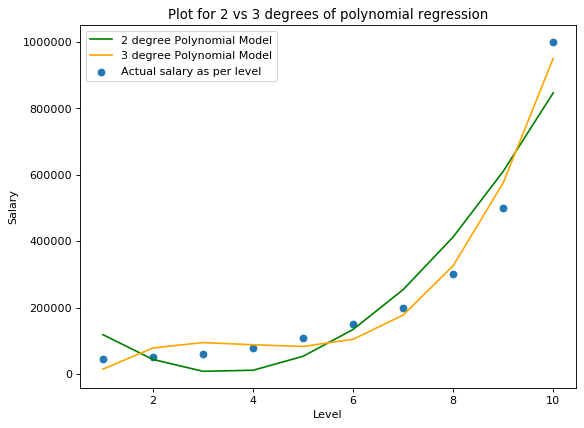

In [131]:
#plotting graphs against data
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='b')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X,y,label='Actual salary as per level')
plt.plot(X,mymodel(X), label='2 degree Polynomial Model', color='green')
plt.plot(X,mymodel1(X), label='3 degree Polynomial Model', color='orange')
plt.legend()
plt.title("Plot for 2 vs 3 degrees of polynomial regression")
plt.show()

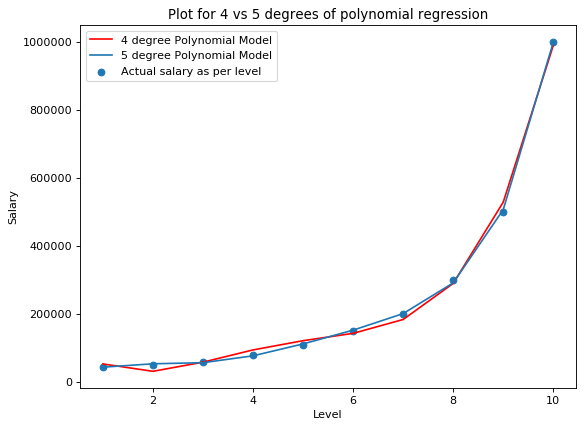

In [129]:
#plotting graphs against data
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='b')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X,y,label='Actual salary as per level')
plt.plot(X,mymodel2(X), label='4 degree Polynomial Model', color='red')
plt.plot(X,mymodel3(X), label='5 degree Polynomial Model')
plt.legend()
plt.title("Plot for 4 vs 5 degrees of polynomial regression")
plt.show()

###  RESULT

#### To test if employee was getting 160000 given level 6.5, the null hypothesis is: predicted salary given level 6.5=160000, whereas alternate hypothesis is: predicted salary given level 6.5 is not equal to 160000.

#### Many polynomial models with different degrees .i.e, 2,3,4,5 are developed. However the model with degrees 4 and 5 are found to be overfitted and model 3 which has larger adjusted r squared than model 2 is selected.

#### Model 3(the best model) is giving the estimate 133259(CI: 47947 and 218571), as 160000 is lying between the confidence interval, therefore we fail to reject the null hypothesis and concluded that the employee was getting 160000.

#### Predicted value of income at level 6.5 with 95% confidence interval of different degrees (3, 4, 5) of polynomial models are given below. In 5 degrees of polynomial model predicted value at 6.5 level is 174878(CI: 166008 and 183747.6) whereas for 4 degrees of freedom it is 158662(CI: 127081 and 190644) moreover, for degrees 3 model value is 133259(CI: 47947 and 218571). As degrees of model is  decreasing, width ofthe  confidence interval is increasing. 

In [78]:
# Model with degree 5

test=mymodel3(6.5)
from numpy import sum as arraysum
from matplotlib import pyplot
sum_errs = arraysum((y - mymodel3(X))**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = test - interval, test + interval
print('95%% confidence interval that for 5 degree of polynomial model the true value is between %.3f and %.3f' % 
      (lower, upper))
print('True value: %.3f' % test)

Prediction Interval: 8869.483
95% confidence interval that for 5 degree of polynomial model the true value is between 166008.595 and 183747.561
True value: 174878.078


In [81]:
# Model with degree 4

test=mymodel2(6.5)
sum_errs = arraysum((y - mymodel2(X))**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = test - interval, test + interval
print('95%% confidence interval that for 3 degree of polynomial model the true value is between %.3f and %.3f' % 
      (lower, upper))
print('True value: %.3f' % test)

Prediction Interval: 31781.615
95% confidence interval that for 3 degree of polynomial model the true value is between 127080.838 and 190644.067
True value: 158862.453


In [82]:
# Model with degree 3

test=mymodel1(6.5)
sum_errs = arraysum((y - mymodel1(X))**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = test - interval, test + interval
print('95%% confidence interval that for 3 degree of polynomial model the true value is between %.3f and %.3f' % 
      (lower, upper))
print('True value: %.3f' % test)

Prediction Interval: 85312.420
95% confidence interval that for 3 degree of polynomial model the true value is between 47947.050 and 218571.889
True value: 133259.470


# Additionally 

### After log transformation to achieve normalization

#### As our main idea was to implement polynomial regression, so the above results are good but as Salary is not normally distributed, by taking log of Salary variable, it got normalized which is confirmed by Shapiro Wilk test. After normalization,  linear regression is capable in predicting the more reliable values as adjusted r squared value is 0.955 in comparison to 0.63.  After predicting the value of level 6.5 and taking antilog to get true values, I got the payment should be 207938.990 with CI 135131.0058 and 319975.6. Trying the polynomial regression with degree 2 leads to overfitting with adjusted rsquared 0.996. In this also 160000 is falling in the 95% confidence interval so we fail to reject the null hypethesis, i.e., the emloyee was getting 160000 at level 6.5.


In [127]:
stats.shapiro(y)

(0.7230921983718872, 0.0016793750692158937)

In [129]:
y=np.log(y)
stats.shapiro(y)

(0.9417275786399841, 0.5723925828933716)

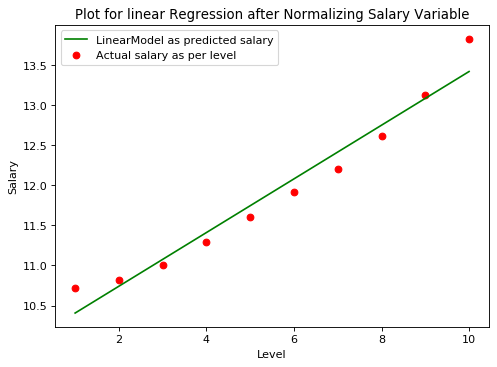

In [200]:
#plotting graphs against data
X=df.iloc[:,1:2].values
y=df.iloc[:,2:].values
y=np.log(y)
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='b')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X,y,label='Actual salary as per level', color='red')
plt.plot(X,data.predict(X),label='LinearModel as predicted salary', color='green')
plt.legend()
plt.title("Plot for linear Regression after Normalizing Salary Variable")
plt.show()

In [149]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
data=reg.fit(X,y)
a=data.score(X, y)
Adj_r2 = 1-(1-a)*(10-1)/(10-1-1)
data.coef_
print("R-squared of the linear regression is", a)
print("Adjusted R-squared of the linear regression is", Adj_r2)

R-squared of the linear regression is 0.959655788391833
Adjusted R-squared of the linear regression is 0.9546127619408121


In [201]:
x=[[6.5]] ## creating level 6.5 from prediction

In [181]:
# Model with degree 3

test=data.predict(x)
sum_errs = arraysum((y - data.predict(X))**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = test - interval, test + interval
print('95%% confidence interval for linear model is between %.3f and %.3f' % (np.exp(lower), np.exp( upper)))
print('Payment should be: %.3f' % np.exp(test))

Prediction Interval: 0.431
95% confidence interval for linear model is between 135095.403 and 320037.633
Payment should be: 207931.751


In [183]:
X=df.iloc[:,1].values
y=df.iloc[:,2].values
y=np.log(y)
mymodel = numpy.poly1d(numpy.polyfit(X, y, 2))

rsq=r2_score(y, mymodel(X))

Adj_r2 = 1-(1-rsq)*(10-1)/(10-2-1)

coeff=mymodel.coefficients

print("R-Squared for 2 degree polynomial model is:", rsq)
print("Adjusted R-Squared for 2 degree polynomial model is:", Adj_r2)
print("Coeffiecients values for 2 degree polynomial model is", coeff)

R-Squared for 2 degree polynomial model is: 0.996755832685959
Adjusted R-Squared for 2 degree polynomial model is: 0.9958289277390902
Coeffiecients values for 2 degree polynomial model is [ 0.02597025  0.04847355 10.64435952]


In [193]:
sum_errs = arraysum((y - mymodel(X))**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = test - interval, test + interval
print('95%% confidence interval for 2 degree polynomial model is between %.3f and %.3f' % (np.exp(lower), np.exp( upper)))
print('Payment should be: %.3f' % np.exp(test))

Prediction Interval: 0.122
95% confidence interval for 2 degree polynomial model is between 183998.238 and 234978.408
Payment should be: 207931.751


### Conclusion

#### Predicted value of income at level 6.5 with 95% confidence interval of different degrees (3, 4, 5) of polynomial models are as given: in 5 degrees of polynomial model predicted value at 6.5 level is 174878(CI: 166008 and 183747.6) whereas for 4 degrees of freedom it is 158662(CI: 127081 and 190644) moreover, for degrees 3 model value is 133259(CI: 47947 and 218571). As degrees of model is  decreasing, width of the confidence interval is increasing. However I am not able to rule out that the employee was not getting 160000 using the best model i.e., model with degree 3. As we see that the confidence interval is wide which can be due to small sample size so larger sample size is needed for more reliable results. The similar results are obtained after normalization of the dependent variable.

#### From the above analysis, we can say that the employee is not telling a lie and there is a good chance he might be getting even more than 160000 payment.